# <font color=blue>***In this sheet, I am going to create a database and create multiple tables from the dataframe in one go and then I will be performing some analysis on the data.***</font>

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***We are first importing our dataset and then try to make the connection to the database***

In [241]:
y = ["user_id", "item_id", "rating", "timestamp"]
df_data =pd.read_csv(r"C:\Users\HP'\Downloads\archive\ml-100k\u.data",delimiter="\t")
df_data.columns = y

In [242]:
i_cols = ['item_id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_items = pd.read_csv(r"C:\Users\HP'\Downloads\archive\ml-100k\u.item", sep='|', names=i_cols,encoding='latin-1')

In [243]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
df_users = pd.read_csv(r"C:\Users\HP'\Downloads\archive\ml-100k\u.user", sep='|', names=u_cols,encoding='latin-1')

# ***Now we are going to make the connection to the database***

In [244]:
import mysql.connector

cnx = mysql.connector.connect(user='root', password='root',
                              host="localhost",
                              database='movies_rating')

### ***In the below code, we are trying to create the schema named movies_rating***

In [245]:
CursorInstance = cnx.cursor()
try:
    CursorInstance.execute("create schema movies_rating")
except:
    print("The database is already created")

The database is already created


In [246]:
try:
    CursorInstance.execute("Use movies_rating")
except:
    print("Already in use")

### ***Here, I am making a engine to connect to the database***

In [247]:
from sqlalchemy import create_engine

host = 'localhost'
user = 'root'
password = 'root'
database = 'movies_rating'

# Create a MySQL connection string
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')


### ***In the below code, I have tried to make the different tables in MySQL using different dataframes***

In [248]:
df_list = [df_data, df_items, df_users]
table_name = ["data", "items", "users"]
for i in range(len(df_list)):
    df_list[i].to_sql(table_name[i], con=engine, if_exists="replace", index=False)

### ***Here, I have been trying to pull the results after the making of database and creating multiple tables in the database in one go.***

In [249]:
CursorInstance.execute("select * from data;")
results=CursorInstance.fetchall()
for row in results:
    print(row)

(186, 302, 3, 891717742)
(22, 377, 1, 878887116)
(244, 51, 2, 880606923)
(166, 346, 1, 886397596)
(298, 474, 4, 884182806)
(115, 265, 2, 881171488)
(253, 465, 5, 891628467)
(305, 451, 3, 886324817)
(6, 86, 3, 883603013)
(62, 257, 2, 879372434)
(286, 1014, 5, 879781125)
(200, 222, 5, 876042340)
(210, 40, 3, 891035994)
(224, 29, 3, 888104457)
(303, 785, 3, 879485318)
(122, 387, 5, 879270459)
(194, 274, 2, 879539794)
(291, 1042, 4, 874834944)
(234, 1184, 2, 892079237)
(119, 392, 4, 886176814)
(167, 486, 4, 892738452)
(299, 144, 4, 877881320)
(291, 118, 2, 874833878)
(308, 1, 4, 887736532)
(95, 546, 2, 879196566)
(38, 95, 5, 892430094)
(102, 768, 2, 883748450)
(63, 277, 4, 875747401)
(160, 234, 5, 876861185)
(50, 246, 3, 877052329)
(301, 98, 4, 882075827)
(225, 193, 4, 879539727)
(290, 88, 4, 880731963)
(97, 194, 3, 884238860)
(157, 274, 4, 886890835)
(181, 1081, 1, 878962623)
(278, 603, 5, 891295330)
(276, 796, 1, 874791932)
(7, 32, 4, 891350932)
(10, 16, 4, 877888877)
(284, 304, 4, 88532

In [250]:
CursorInstance.column_names

('user_id', 'item_id', 'rating', 'timestamp')

In [251]:
CursorInstance.rowcount

99999

In [252]:
data = pd.read_sql_query('SELECT * FROM data', engine)

In [253]:
data.head(2)

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116


In [254]:
items = pd.read_sql_query("SELECT * FROM items;", engine)

In [255]:
items.head(2)

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,None,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,None,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [256]:
users = pd.read_sql_query("SELECT * FROM users", engine)

In [257]:
users.head(2)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [258]:
data.shape

(99999, 4)

In [259]:
items.shape

(1682, 24)

In [260]:
users.shape

(943, 5)

In [261]:
CursorInstance.execute("SHOW databases")
databases = CursorInstance.fetchall()
for (i,) in databases:
    print(i)

electricbillgeneration
fmgc_product
gdb023
gdb041
gdb056
grpby
information_schema
inventory_management
movies_rating
moviesdb
mysql
performance_schema
sakila
sales
survey_response
sys
us_accidents
world


In [262]:
data.head(2)

,user_id,item_id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116


In [263]:
items.head(2)

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,None,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,None,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [264]:
users.head(2)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


### ***Here, I am  going to merge all the dataframmes in the one dataframe named data.***

In [265]:
df = [items, users]
id = ["item_id","user_id"]

for i in range(len(df)):
    data = data.merge(df[i], on=id[i])

### ***I want to see all the columns in the dataframe***

In [266]:
pd.set_option("display.max_columns", None)
data.head(2)

,user_id,item_id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,sex,occupation,zip_code
0,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,None,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,39,F,executive,00000
1,186,257,4,891719774,Men in Black (1997),04-Jul-1997,None,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,39,F,executive,00000


In [267]:
data.shape

(99999, 31)

# ***Now, we can start the whole analysis using panadas and single dataframe derived from the merging of all 3 dataframes.***

### ***Now, I want to see the duplicates values in our dataframe***

In [268]:
data.duplicated().sum()

0

### ***Now, I want to see the null values in our dataframe***

In [269]:
data.isnull().sum()

user_id                   0
item_id                   0
rating                    0
timestamp                 0
movie title               0
release date              9
video release date    99999
IMDb URL                 13
unknown                   0
Action                    0
Adventure                 0
Animation                 0
Children's                0
Comedy                    0
Crime                     0
Documentary               0
Drama                     0
Fantasy                   0
Film-Noir                 0
Horror                    0
Musical                   0
Mystery                   0
Romance                   0
Sci-Fi                    0
Thriller                  0
War                       0
Western                   0
age                       0
sex                       0
occupation                0
zip_code                  0
dtype: int64

In the above code, we can see that the all the rows in our data from the video release date columns are empty, so we can drop the whole column from our dataframe.

In [270]:
data.drop("video release date", axis=1, inplace=True)

### ***Now, I want to know the datatypes of all the features in our dataframe.***

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       99999 non-null  int64 
 1   item_id       99999 non-null  int64 
 2   rating        99999 non-null  int64 
 3   timestamp     99999 non-null  int64 
 4   movie title   99999 non-null  object
 5   release date  99990 non-null  object
 6   IMDb URL      99986 non-null  object
 7   unknown       99999 non-null  int64 
 8   Action        99999 non-null  int64 
 9   Adventure     99999 non-null  int64 
 10  Animation     99999 non-null  int64 
 11  Children's    99999 non-null  int64 
 12  Comedy        99999 non-null  int64 
 13  Crime         99999 non-null  int64 
 14  Documentary   99999 non-null  int64 
 15  Drama         99999 non-null  int64 
 16  Fantasy       99999 non-null  int64 
 17  Film-Noir     99999 non-null  int64 
 18  Horror        99999 non-null  int64 
 19  Musi

In the above output, the timestamp and release date are of different datatypes, so we will be changing their dataypes to datetime.

### ***Changing the datatypes of the dates related columns to datetime.***

In [272]:
col = ["timestamp", "release date"]

for i in col:
    data[i] = pd.to_datetime(data[i], errors='coerce')


In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       99999 non-null  int64         
 1   item_id       99999 non-null  int64         
 2   rating        99999 non-null  int64         
 3   timestamp     99999 non-null  datetime64[ns]
 4   movie title   99999 non-null  object        
 5   release date  99990 non-null  datetime64[ns]
 6   IMDb URL      99986 non-null  object        
 7   unknown       99999 non-null  int64         
 8   Action        99999 non-null  int64         
 9   Adventure     99999 non-null  int64         
 10  Animation     99999 non-null  int64         
 11  Children's    99999 non-null  int64         
 12  Comedy        99999 non-null  int64         
 13  Crime         99999 non-null  int64         
 14  Documentary   99999 non-null  int64         
 15  Drama         99999 non-null  int64 

In the above code, we have succesfully changedt the datatypes of the columns to datetime

In [274]:
import datetime as dt
data["timestamp"].dt.year.max()

1970

In [275]:
import datetime as dt
data["timestamp"].dt.month_name().max()

'January'

In [276]:
data.describe()

,user_id,item_id,rating,timestamp,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age
count,99999.000000,99999.000000,99999.000000,99999,99990,99999.0000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000
mean,462.487415,425.531965,3.529865,1970-01-01 00:00:00.883528874,1988-02-08 23:56:04.104410496,0.0001,0.255893,0.137531,0.036050,0.071821,0.298313,0.080551,0.007580,0.398954,0.013520,0.017330,0.053171,0.049540,0.052451,0.194612,0.127301,0.218722,0.093981,0.018540,32.96969
min,1.000000,1.000000,1.000000,1970-01-01 00:00:00.874724710,1922-01-01 00:00:00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.00000
25%,254.000000,175.000000,3.000000,1970-01-01 00:00:00.879448704,1986-01-01 00:00:00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.00000
50%,447.000000,322.000000,4.000000,1970-01-01 00:00:00.882826944,1994-01-01 00:00:00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.00000
75%,682.000000,631.000000,4.000000,1970-01-01 00:00:00.888259984,1996-09-28 00:00:00,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.00000
max,943.000000,1682.000000,5.000000,1970-01-01 00:00:00.893286638,1998-10-23 00:00:00,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,73.00000
std,266.614421,330.799501,1.125678,NaN,NaN,0.0100,0.436364,0.344409,0.186416,0.258192,0.457520,0.272145,0.086733,0.489686,0.115488,0.130499,0.224375,0.216995,0.222935,0.395904,0.333312,0.413382,0.291804,0.134895,11.56257


# ***Now, we will be answering to some adhoc questions***

### ***Explore the "timestamp" column. Can you extract any useful information like day of the week or time of day for rentals? Clean and format the timestamp data accordingly***

In [277]:
data["months"] = data["release date"].dt.month_name()
data.head(2)

,user_id,item_id,rating,timestamp,movie title,release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,sex,occupation,zip_code,months
0,186,302,3,1970-01-01 00:00:00.891717742,L.A. Confidential (1997),1997-01-01,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,39,F,executive,00000,January
1,186,257,4,1970-01-01 00:00:00.891719774,Men in Black (1997),1997-07-04,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,39,F,executive,00000,July


In [278]:
days_groupby = data.groupby("months").agg({
                        "age": "mean",
                        "rating": "mean"
                        })

In [279]:
days_groupby.reset_index(inplace=True)

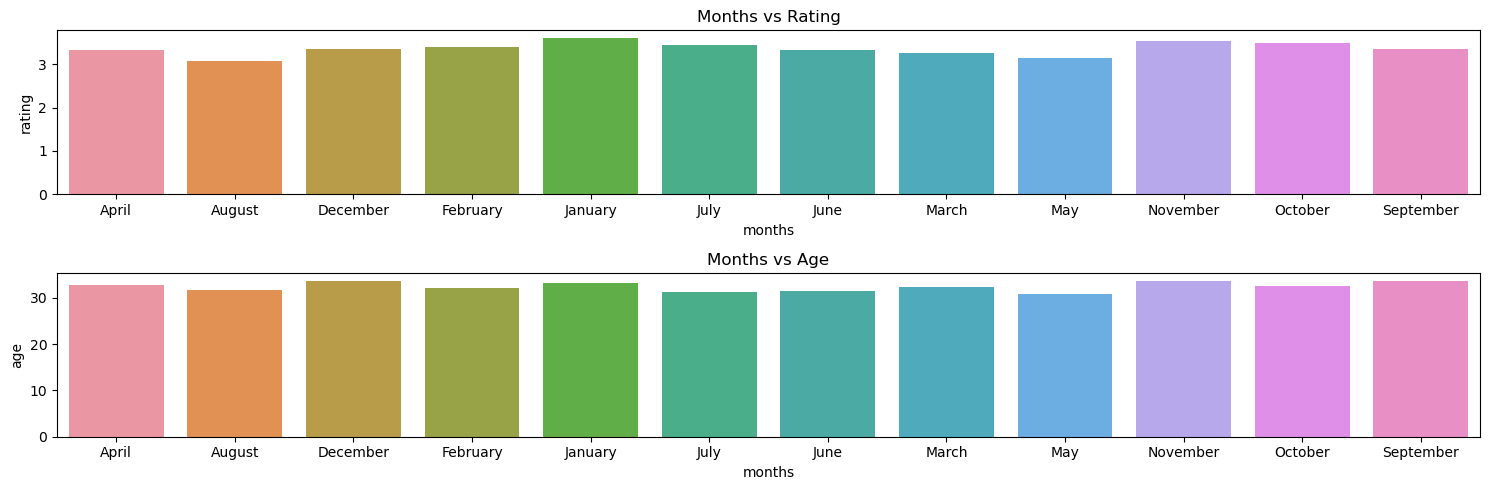

In [280]:
plt.figure(figsize=(15, 5))

plt.subplot(2, 1, 1)
sns.barplot(x="months", y="rating", data=days_groupby)
plt.title("Months vs Rating")

plt.subplot(2, 1, 2)
sns.barplot(x="months", y="age", data=days_groupby)
plt.title("Months vs Age")

plt.tight_layout()

plt.show()

### ***Look for outliers and inconsistencies in the "rating" column. How would you handle outliers? Justify your chosen method.***

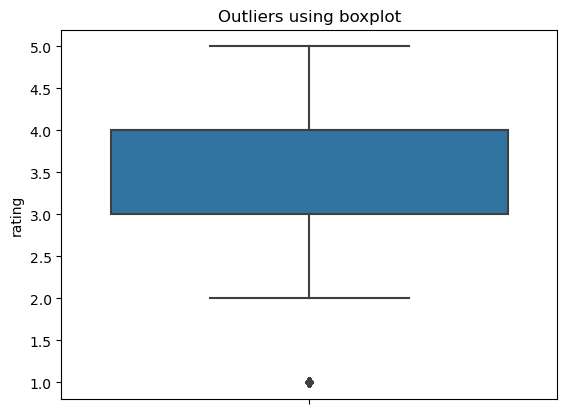

In [281]:
sns.boxplot(y="rating", data=data)
plt.title("Outliers using boxplot")
plt.show()

In the above code, we can say that there are so many values whose rating is 1

data[]

In [282]:
data[data["rating"]==1]["rating"].sum()

6110

In the above code, we can say that there are 6110 values, whose rating is 1

In [283]:
mean = data["rating"].mean()
std_dev = data["rating"].std()
threshold = 3
outlier = []
z_test  = (data["rating"] - mean)/std_dev
for i in z_test:
    if (i < -threshold) | (i > threshold):
        outlier.append(i)
print(outlier)

[]


In the above code, we can say that there is no outliers. There is no single value greater than the threshold z_score.

### ***Histogram for the distribution of movies ratings.***

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


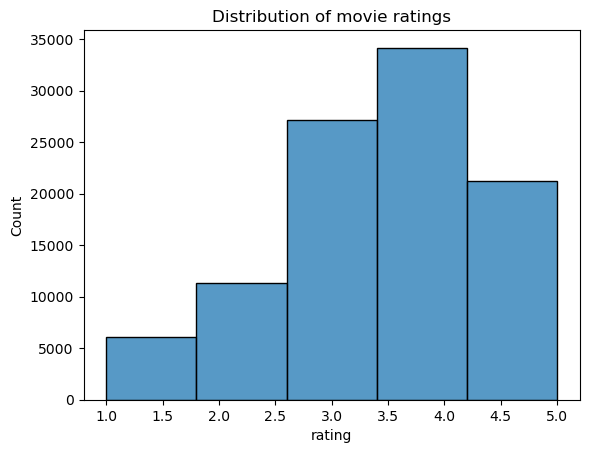

In [284]:
sns.histplot(x="rating", data=data, bins=5)
plt.title("Distribution of movie ratings")
plt.show()

### ***Bar to represent the top rated movies***

In [285]:
best_movies = data[data["rating"] == data["rating"].max()].head(10)

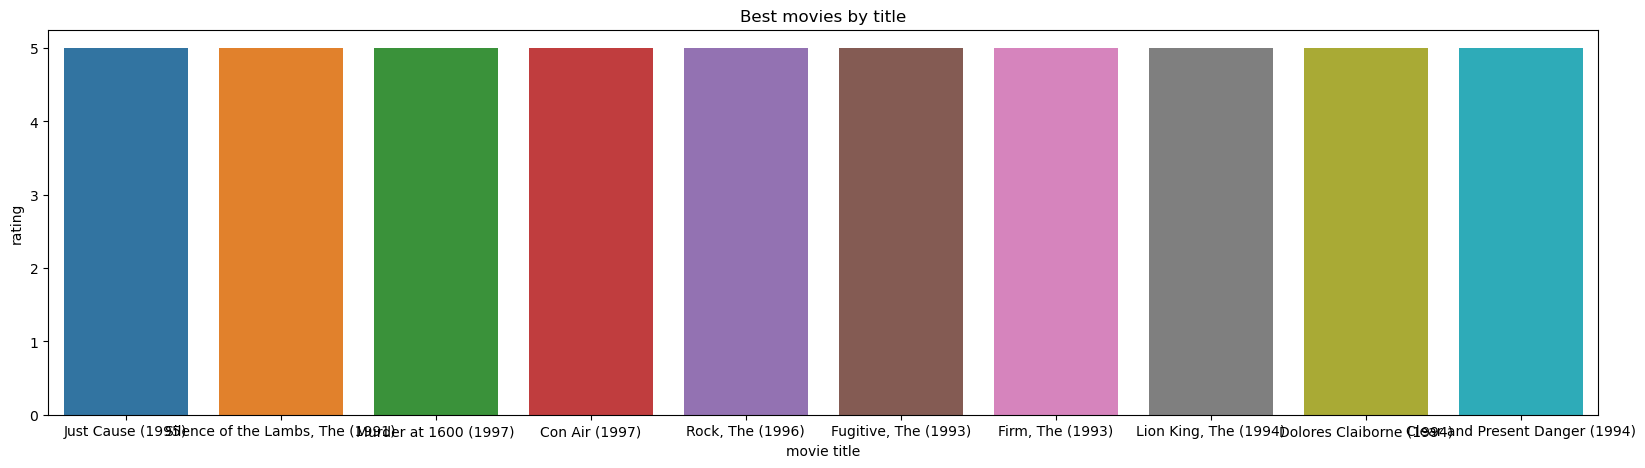

In [286]:
plt.figure(figsize=(20, 5))
sns.barplot(x="movie title", y="rating", data=best_movies)
plt.title("Best movies by title")
plt.show()

### ***Now, I want to fnd the maximum number of releases per day.***

In [287]:
data["days"] = data["release date"].dt.day_name()

In [288]:
movies_count_days = data.groupby("days").agg({"days": "count"})
movies_count_days

,days
days,
Friday,36456
Monday,7576
Saturday,12930
Sunday,16134
Thursday,4019
Tuesday,7145
Wednesday,15730


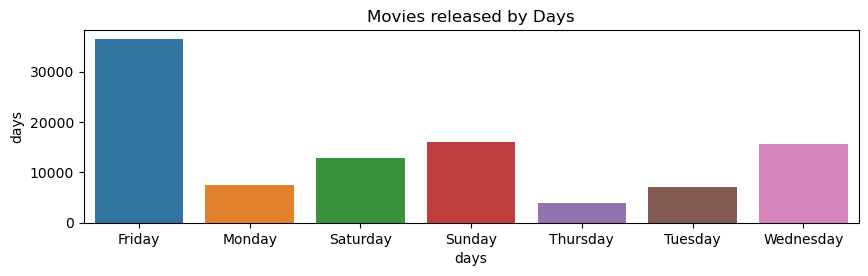

In [296]:
plt.figure(figsize=(10, 2.5))
sns.barplot(x=movies_count_days.index, y="days", data=movies_count_days)
plt.title("Movies released by Days")
plt.show()

### ***Movies count by Occupations.***

In [301]:
movies_by_occupation = data.groupby("occupation").agg({"movie title":"count"}).sort_values(by="movie title", ascending=False).head(10)

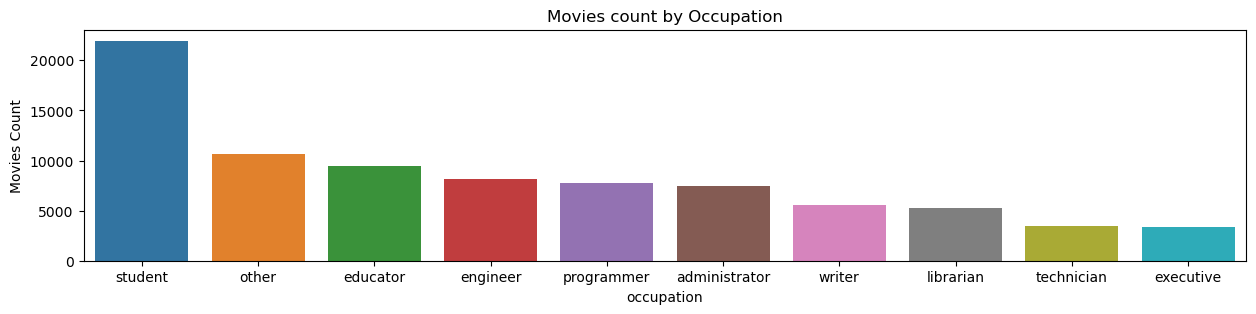

In [306]:
plt.figure(figsize=(15, 3))
sns.barplot(x = movies_by_occupation.index, y="movie title", data=movies_by_occupation)
plt.title("Movies count by Occupation")
plt.ylabel("Movies Count")
plt.show()

### ***Movies count by Genre***

In [319]:
movis_by_genre = data.iloc[:,8:26].sum().to_frame("Count").sort_values(by="Count", ascending=False).head(10)
movis_by_genre

,Count
Drama,39895
Comedy,29831
Action,25589
Thriller,21872
Romance,19461
Adventure,13753
Sci-Fi,12730
War,9398
Crime,8055
Children's,7182


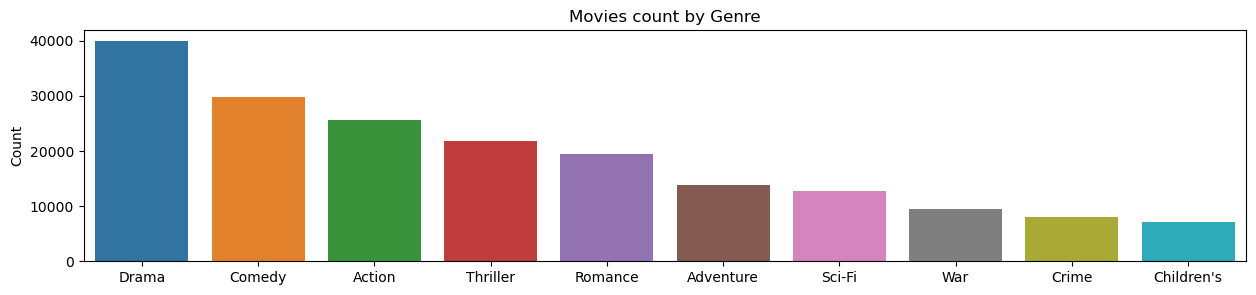

In [322]:
plt.figure(figsize=(15, 3))
sns.barplot(x=movis_by_genre.index, y="Count", data=movis_by_genre)
plt.title("Movies count by Genre")
plt.show()